<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

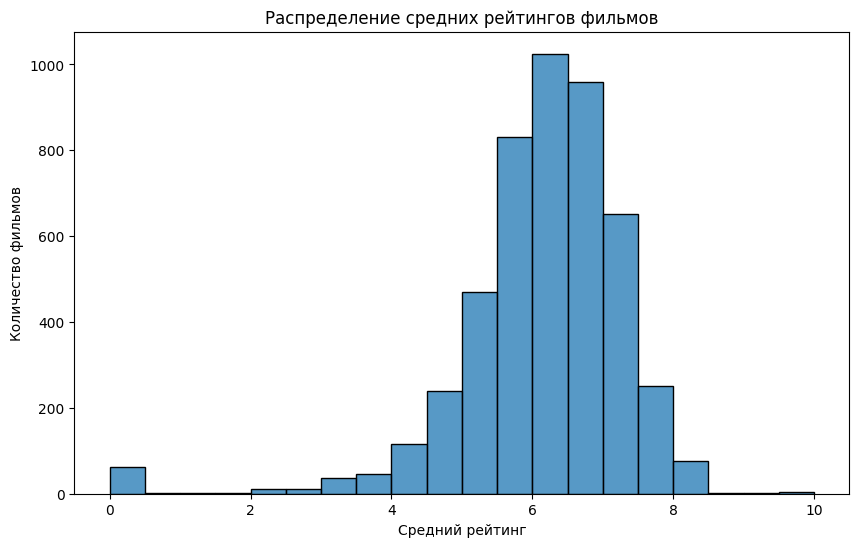

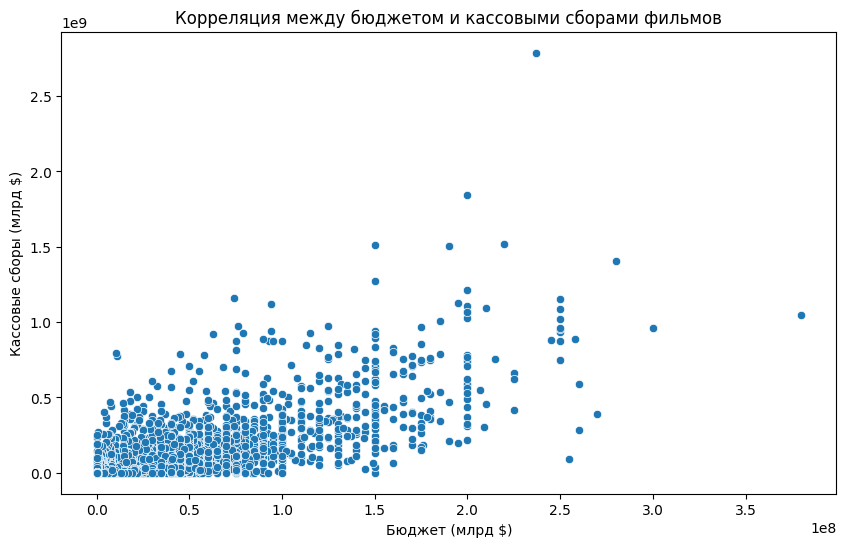

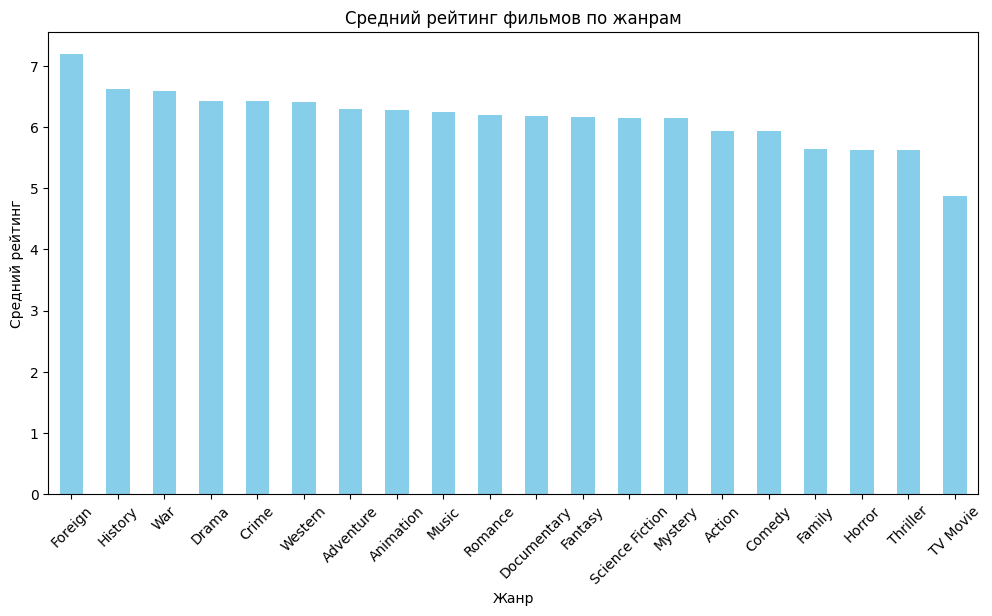

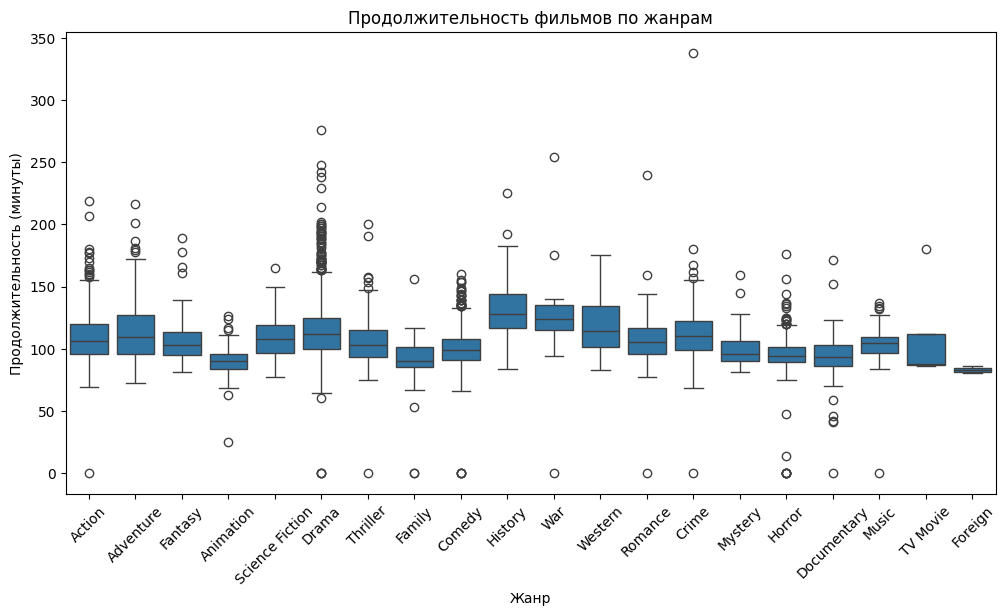

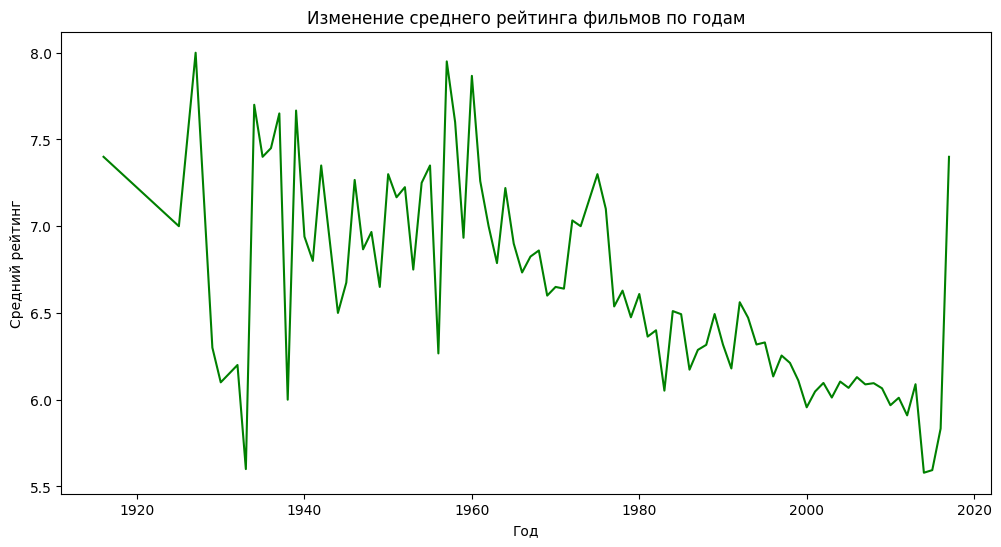

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd

# Загрузим и предварительно осмотрим данные из загруженного файла
file_path = 'tmdb_5000_movies.csv'
movies_data = pd.read_csv(file_path)

# Показать основную информацию о датасете
movies_data.info(), movies_data.head()

# Некоторые поля в датасете содержат JSON-строки. Например, 'genres'. Мы их преобразуем.
def parse_json_column(data, column):
    return data[column].apply(json.loads)

# Преобразование поля 'genres' и извлечение первого жанра для упрощения анализа
movies_data['genres'] = parse_json_column(movies_data, 'genres')
movies_data['first_genre'] = movies_data['genres'].apply(lambda x: x[0]['name'] if x else None)

# Преобразование поля 'release_date' в формат даты
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'], errors='coerce')

# 1. Гистограмма распределения рейтингов фильмов
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['vote_average'], bins=20, kde=False)
plt.title("Распределение средних рейтингов фильмов")
plt.xlabel("Средний рейтинг")
plt.ylabel("Количество фильмов")
plt.show()

# 2. Точечная диаграмма для анализа корреляции между бюджетом и кассовыми сборами
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_data, x='budget', y='revenue')
plt.title("Корреляция между бюджетом и кассовыми сборами фильмов")
plt.xlabel("Бюджет (млрд $)")
plt.ylabel("Кассовые сборы (млрд $)")
plt.show()

# 3. Столбчатая диаграмма среднего рейтинга по жанрам
avg_rating_by_genre = movies_data.groupby('first_genre')['vote_average'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title("Средний рейтинг фильмов по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Средний рейтинг")
plt.xticks(rotation=45)
plt.show()

# 4. Коробчатая диаграмма продолжительности фильмов по жанрам
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_data, x='first_genre', y='runtime')
plt.title("Продолжительность фильмов по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Продолжительность (минуты)")
plt.xticks(rotation=45)
plt.show()

# 5. Линейный график изменения среднего рейтинга фильмов по годам
movies_data['year'] = movies_data['release_date'].dt.year
avg_rating_by_year = movies_data.groupby('year')['vote_average'].mean()
plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(kind='line', color='green')
plt.title("Изменение среднего рейтинга фильмов по годам")
plt.xlabel("Год")
plt.ylabel("Средний рейтинг")
plt.show()

In [ ]:
"""
1. Гистограмма Распределения Средних Рейтингов Фильмов

Переменные: Средний рейтинг фильма (количественная).
Цель: Наблюдение за распределением рейтингов фильмов.
Выбор графика: Гистограмма отлично подходит для визуализации распределения частоты значений одной количественной переменной.

2. Точечная Диаграмма Корреляции между Бюджетом и Кассовыми Сборами

Переменные: Бюджет и кассовые сборы фильма (обе количественные).
Цель: Исследование взаимосвязи между бюджетом фильма и его кассовыми сборами.
Выбор графика: Точечная диаграмма позволяет увидеть корреляцию между двумя количественными переменными.

3. Столбчатая Диаграмма Среднего Рейтинга по Жанрам

Переменные: Жанр фильма (категориальная) и средний рейтинг (количественная).
Цель: Сравнение средних рейтингов фильмов в различных жанрах.
Выбор графика: Столбчатые диаграммы идеально подходят для сравнения значений между категориями.

4. Коробчатая Диаграмма Продолжительности Фильмов по Жанрам

Переменные: Жанр фильма (категориальная) и продолжительность фильма (количественная).
Цель: Анализ распределения продолжительности фильмов по различным жанрам.
Выбор графика: Коробчатая диаграмма показывает распределение значений, медиану, квартили и выбросы для каждой категории.

5. Линейный График Изменения Среднего Рейтинга Фильмов по Годам

Переменные: Год выпуска фильма (количественная) и средний рейтинг (количественная).
Цель: Наблюдение за тенденциями изменения среднего рейтинга фильмов с течением времени.
Выбор графика: Линейный график подходит для отображения тенденций и изменений по времени.​"""